# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Exploratory Data Analysis and Feature Engineering.


### Import Libraries


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [6]:
df=pd.read_csv("data_falcon9_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


### Flight Number and Payload Mass

First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


Text(0, 0.5, 'Pay load Mass (kg)')

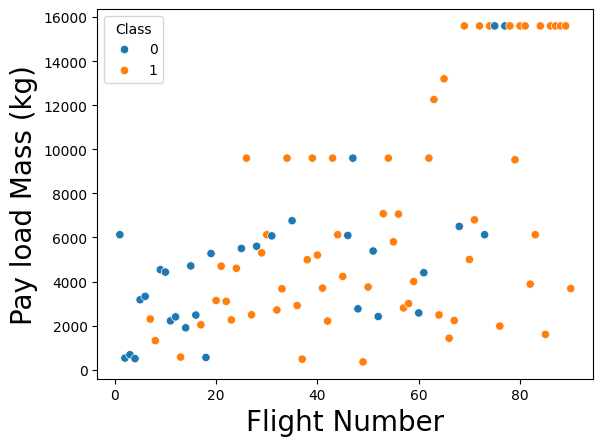

In [7]:
sns.scatterplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)

Text(0, 0.5, 'Pay load Mass (kg)')

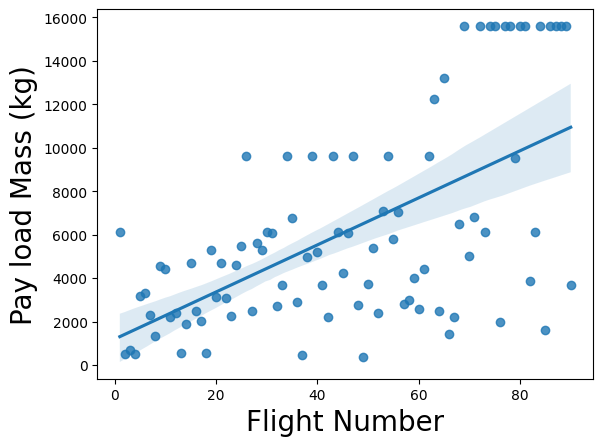

In [22]:
sns.regplot(y="PayloadMass", x="FlightNumber", data=df)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)

We can see that as the Flight Number increases SpaceX has increased its experiments with higher payload mass.

### Flight Number and Launch Site


Use the function catplot to plot FlightNumber vs LaunchSite, set the  parameter x  parameter to FlightNumber,set the  y to Launch Site and set the parameter hue to 'class'


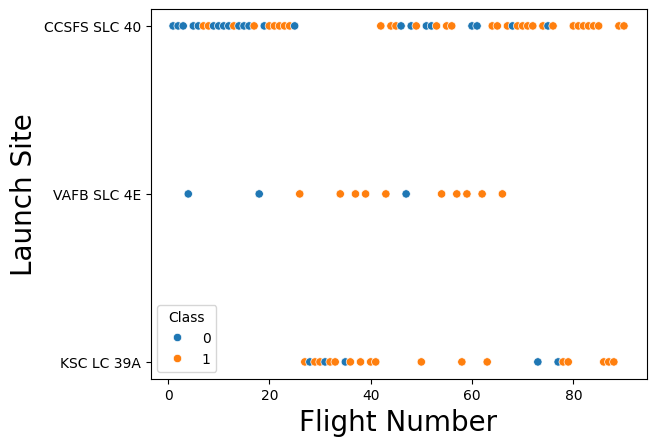

In [8]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.scatterplot(x='FlightNumber', y='LaunchSite', hue='Class', data=df)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Launch Site', fontsize=20)
plt.show()

We see that different launch sites have different success rates.  CCAFS SLC-40, has a success rate of about 60 %, while  KSC LC-39A and VAFB SLC 4E has a success rate of about 75%.


We can Observe that:

- The earliest flights all failed while the latest flights all succeeded.
- The CCAFS SLC 40 launch site has about a half of all launches.
- VAFB SLC 4E and KSC LC 39A have higher success rates.
- It can be assumed that each new launch has a higher rate of success.

### Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


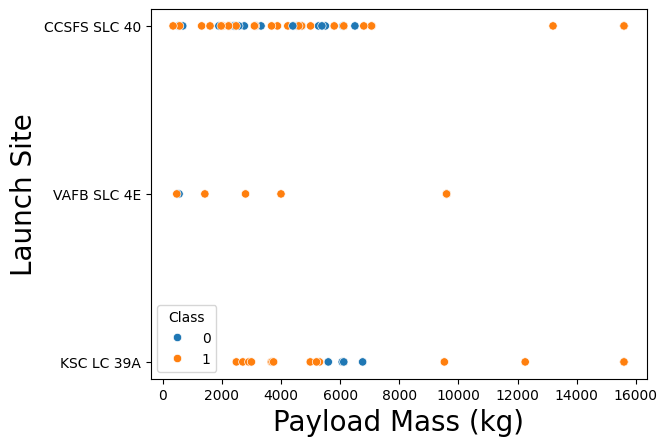

In [9]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.scatterplot(x='PayloadMass', y='LaunchSite', hue='Class', data=df)
plt.xlabel('Payload Mass (kg)',fontsize=20)
plt.ylabel('Launch Site',fontsize=20)
plt.show()

### Observation:

- For every launch site the higher the payload mass, the higher the success rate.
- Most of the launches with payload mass over 7000 kg were successfull.
- KSC LC 39A has a 100% success rate for payload mass under 5500 kg too.

### Success rate of each orbit type


Let's create a bar chart for the sucess rate of each orbit


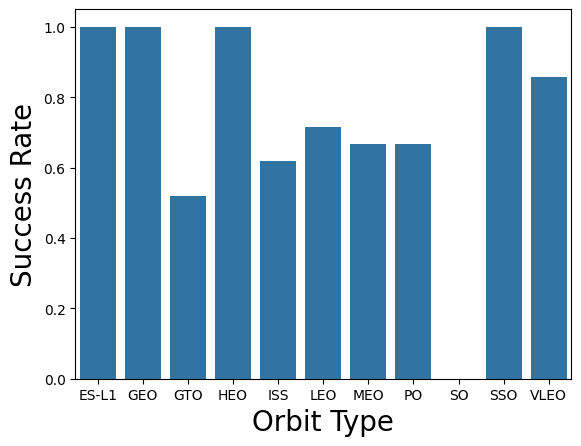

In [10]:
sns.barplot(x= 'Orbit', y = 'Class', data = df.groupby('Orbit')['Class'].mean().to_frame())
plt.xlabel('Orbit Type',fontsize=20)
plt.ylabel('Success Rate',fontsize=20)
plt.show()

### Observation:

- Orbits with 100% success rate are:
    * ES-L1
    * GEO
    * HEO
    * SSO
- Orbits with 0% success rate are:
    * SO
- Orbits with success rate between 50% and 85%:
    * GTO
    * ISS
    * LEO
    * MEO
    * PO

### Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


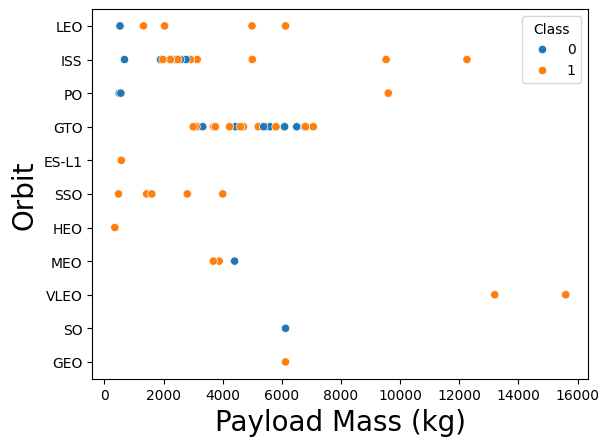

In [11]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.scatterplot(x = 'PayloadMass', y = 'Orbit', hue = 'Class', data = df)
plt.xlabel('Payload Mass (kg)', fontsize = 20)
plt.ylabel('Orbit', fontsize = 20)
plt.show()

You should observe that Heavy payloads have a negative influence on GTO orbits and positive on many other orbits.


### Launch success yearly trend


Function to get the year from the date:


In [12]:
# A function to Extract years from the date 
def Extract_year(s):
    return s.split("-")[0]

In [13]:
df['Year'] = df['Date'].map(Extract_year)
df['Year'].head()

0    2010
1    2012
2    2013
3    2013
4    2013
Name: Year, dtype: object

<Axes: xlabel='Year', ylabel='Class'>

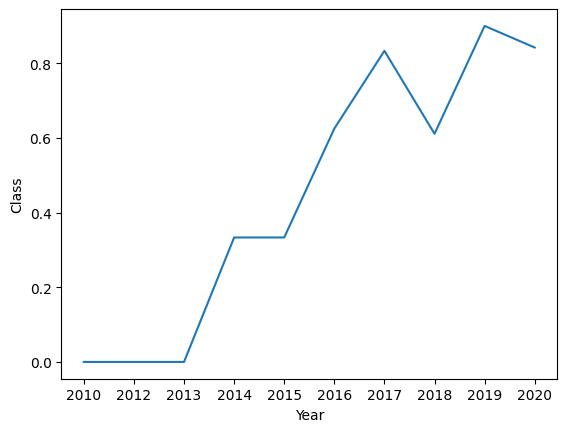

In [14]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
sns.lineplot(x='Year', y='Class', data=df.groupby('Year')['Class'].mean().to_frame())

you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


In [15]:
features = df.loc[:, :]
features.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


In [16]:
# Type of each column
features.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
Class               int64
Year               object
dtype: object

### Removing unnecessary columns
The Unnecessary columns are:
FlightNumber, Date, BoosterVersion, Outcome, Longitude, and Latitude and Year.

In [17]:
# Removing the columns which are not required
features.drop(['FlightNumber', 'Date', 'BoosterVersion', 'Outcome', 'Longitude', 'Latitude', 'Year'], axis=1, inplace=True)
features.head()

,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Class
0,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003,0
1,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005,0
2,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007,0
3,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003,0
4,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004,0


### Create dummy variables to categorical columns


Use the function get_dummies and features dataframe to apply OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial. Assign the value to the variable features_one_hot, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [18]:
features_one_hot = pd.get_dummies(features)
features_one_hot.head()

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6123.547647,1,False,False,False,1.0,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,525.000000,1,False,False,False,1.0,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,677.000000,1,False,False,False,1.0,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,500.000000,1,False,False,False,1.0,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3170.000000,1,False,False,False,1.0,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### Casting all numeric columns to float64


Now that our features_one_hot dataframe only contains numbers cast the entire dataframe to variable type float64


In [19]:
features_one_hot.astype('float64')

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,15600.000000,2.0,1.0,1.0,1.0,5.0,12.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,15600.000000,3.0,1.0,1.0,1.0,5.0,13.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,15600.000000,6.0,1.0,1.0,1.0,5.0,12.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,15600.000000,3.0,1.0,1.0,1.0,5.0,12.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
features_one_hot.shape

(90, 80)

### Exporting the dataset

In [21]:
features_one_hot.to_csv('data_falcon9_3.csv', index=False)